In [1]:
import torch

In [2]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.0.1+cpu'

In [7]:
import matplotlib.pyplot as plt
import torch
import torchvision



In [8]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
import requests
import zipfile
from pathlib import Path

import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [10]:
data_path = Path("data/")
image_path = Path("data/")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data'.
There are 5 directories and 0 images in 'data\test'.
There are 0 directories and 42 images in 'data\test\Combat'.
There are 0 directories and 42 images in 'data\test\DestroyedBuildings'.
There are 0 directories and 42 images in 'data\test\Fire'.
There are 0 directories and 47 images in 'data\test\Humanitarian Aid and rehabilitation'.
There are 0 directories and 42 images in 'data\test\Military vehicles and weapons'.
There are 5 directories and 0 images in 'data\train'.
There are 0 directories and 163 images in 'data\train\Combat'.
There are 0 directories and 249 images in 'data\train\DestroyedBuildings'.
There are 0 directories and 334 images in 'data\train\Fire'.
There are 0 directories and 318 images in 'data\train\Humanitarian Aid and rehabilitation'.
There are 0 directories and 247 images in 'data\train\Military vehicles and weapons'.


Random image path: data\train\DestroyedBuildings\photographic-documentation-of-the-devastating-earthquake-in-central-italy-free-p (4).jpg
Image class: DestroyedBuildings
Image height: 200
Image width: 133


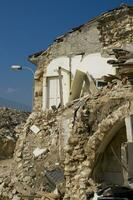

In [11]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

(200, 133, 3)


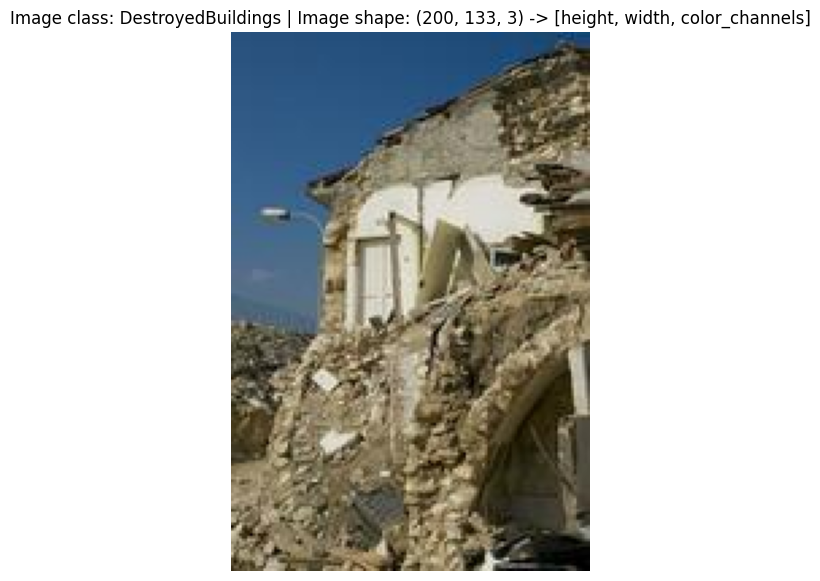

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);
print(img_as_array.shape)

In [13]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/train'), WindowsPath('data/test'))

## Transformations

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [15]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [16]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=manual_transforms, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=manual_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 1311
    Root location: data\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 215
    Root location: data\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [17]:
# Get class names as a list
class_names = train_data.classes
class_names

['Combat',
 'DestroyedBuildings',
 'Fire',
 'Humanitarian Aid and rehabilitation',
 'Military vehicles and weapons']

In [18]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'Combat': 0,
 'DestroyedBuildings': 1,
 'Fire': 2,
 'Humanitarian Aid and rehabilitation': 3,
 'Military vehicles and weapons': 4}

In [19]:
len(train_data), len(test_data)

(1311, 215)

In [20]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[ 2.0777,  2.0777,  2.0605,  ...,  2.0092,  2.0092,  2.0092],
         [ 2.0948,  2.0777,  2.0777,  ...,  2.0092,  2.0092,  2.0092],
         [ 2.0948,  2.0777,  2.0777,  ...,  2.0092,  2.0092,  2.0092],
         ...,
         [-1.3644, -1.2959, -1.1589,  ..., -0.0116,  0.0398,  0.1083],
         [-1.3473, -1.2617, -1.0733,  ..., -0.0629, -0.0287,  0.0056],
         [-1.3473, -1.2103, -0.9363,  ..., -0.0801, -0.0801, -0.0801]],

        [[ 2.2535,  2.2535,  2.2360,  ...,  2.1835,  2.1835,  2.1835],
         [ 2.2710,  2.2535,  2.2535,  ...,  2.1835,  2.1835,  2.1835],
         [ 2.2710,  2.2535,  2.2535,  ...,  2.1835,  2.1835,  2.1835],
         ...,
         [-1.2654, -1.1954, -1.0553,  ...,  0.1176,  0.1702,  0.2402],
         [-1.2479, -1.1604, -0.9678,  ...,  0.0651,  0.1001,  0.1352],
         [-1.2479, -1.1078, -0.8277,  ...,  0.0476,  0.0476,  0.0476]],

        [[ 2.4657,  2.4657,  2.4483,  ...,  2.3960,  2.3960,  2.3960],
         [ 2.4831,  2.4657,  2.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


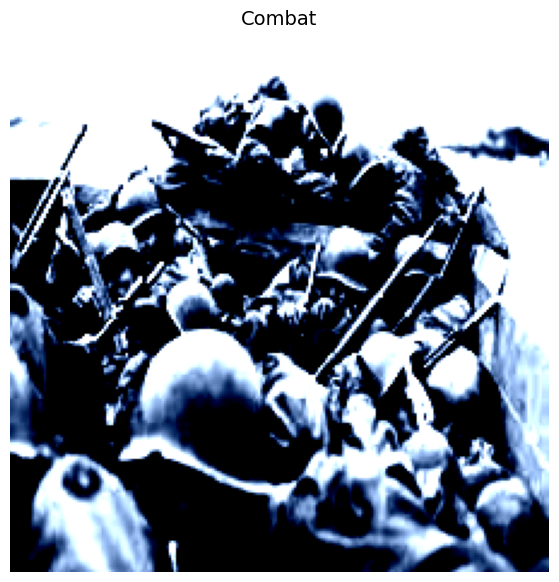

In [21]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [22]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f88b2a3a90>,
 <torch.utils.data.dataloader.DataLoader at 0x1f889d4dd50>)

In [23]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [24]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((300, 300)), 
    transforms.ToTensor()
])

In [25]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=train_transforms)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transforms )

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 16 workers.


(<torch.utils.data.dataloader.DataLoader at 0x1f88b419c10>,
 <torch.utils.data.dataloader.DataLoader at 0x1f88b45dd90>)

## Creating a transform for torchvision.models (auto creation)

In [26]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [27]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [28]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [29]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model = torchvision.models.efficientnet_b0(weights=weights).to(device)


In [30]:
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [31]:
for param in model.features.parameters():
    param.requires_grad = False

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [41]:

#VGG-16

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [43]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [44]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [47]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS =5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()


# Train model_0 

model_0_results = train(model=model, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)


# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6461 | train_acc: 0.8634 | test_loss: 0.3872 | test_acc: 0.9464


In [ ]:
    img = image_to_tensor("fire1.jpeg")
    
    y_logits =model(img.unsqueeze(dim = 0))
    y_pred_prob = torch.softmax(y_logits , dim = 1)
    y_pred = torch.argmax(y_pred_prob).item()
    
    
    dic = {0 :"combat",
     1: "destroyedbuilding",
     2:"fire",
     3:"humanitarianaid",
     4:"militaryvehicles"}
    
    
    event = dic[ y_pred]
    
    
    event

In [ ]:
model.state_dict()

In [ ]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model, # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

In [ ]:
def image_to_tensor(image_path):
    # Open the image using PIL
    img = Image.open(image_path)


    # Convert the image to a PyTorch tensor
    transform = transforms.ToTensor()
    
    tensor = transform(img)
    transform = transforms.Resize((224, 224))
    tensor = transform(tensor)
    
    return tensor

In [ ]:
def classify_event(image):
    '''
    ADD YOUR CODE HERE
    '''
    device = "cuda" if torch.cuda.is_available() else "cpu"

    
    torch.manual_seed(42)
    model = torch.load('model.pth')
        


    img = image_to_tensor(image)
    
    y_logits =model(img.unsqueeze(dim = 0))
    y_pred_prob = torch.softmax(y_logits , dim = 1)
    y_pred = torch.argmax(y_pred_prob).item()
    
    
    dic = {0 :"combat",
     1: "destroyedbuilding",
     2:"fire",
     3:"humanitarianaid",
     4:"militaryvehicles"}
    
    event = dic[ y_pred]
    
    print(y_pred_prob )
    return event


In [ ]:
classify_event('rehab2.jpeg')

In [ ]:
classify_event('rehab1.jpeg')

In [ ]:
classify_event('building1.jpeg')

In [ ]:
classify_event('building2.jpeg')

In [129]:
classify_event('fire2.jpeg')

tensor([[3.3664e-05, 3.4933e-05, 9.9992e-01, 1.9141e-06, 6.3689e-06]],
       grad_fn=<SoftmaxBackward0>)


'fire'

In [130]:
classify_event('fire1.jpeg')

tensor([[2.3880e-02, 9.9230e-02, 8.1837e-01, 5.7873e-02, 6.4819e-04]],
       grad_fn=<SoftmaxBackward0>)


'fire'